In [2]:
# storing and anaysis
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# interactive plots
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# geographical ploting
# import folium
# import geopandas as gpd

In [3]:
# offline plotly
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [4]:
# color pallette
cnf = '#393e46' # confirmed - grey
dth = '#ff2e63' # death - red
rec = '#21bf73' # recovered - cyan
act = '#fe9801' # active case - yellow

In [5]:
# MoHFW data
# ==========

# read data
df = pd.read_csv('./input/complete.csv')

# convert datetime datatype
df['Date'] = pd.to_datetime(df['Date'])

# rename columns
df.columns = ['Date', 'State', 'Latitude', 'Longitude', 'Confirmed', 'Deaths', 'Recovered', 
              'New cases', 'New deaths', 'New recovered']

# active cases
df['Active'] = df['Confirmed'] - df['Deaths'] - df['Recovered']

# first few rows
df.head()

,Date,State,Latitude,Longitude,Confirmed,Deaths,Recovered,New cases,New deaths,New recovered,Active
0,2020-01-30,Kerala,10.8505,76.2711,1,0,0,0,0,0,1
1,2020-01-31,Kerala,10.8505,76.2711,1,0,0,0,0,0,1
2,2020-02-01,Kerala,10.8505,76.2711,2,0,0,1,0,0,2
3,2020-02-02,Kerala,10.8505,76.2711,3,0,0,1,0,0,3
4,2020-02-03,Kerala,10.8505,76.2711,3,0,0,0,0,0,3


In [6]:
# daily
# =====

# read data
daily = pd.read_csv('./input/nation_level_daily.csv')

# convert datetime datatype
daily['Date'] = pd.to_datetime(daily['Date'] + ' 2020')

# get no. of active cases
daily['Total Active'] = daily['Total Confirmed'] - daily['Total Deceased'] - daily['Total Recovered']

In [7]:
# Deaths / 100 cases
daily['Deaths / 100 Cases'] = round((daily['Total Deceased'] / daily['Total Confirmed'])*100, 2)

# Recovered / 100 cases
daily['Recovered / 100 Cases'] = round((daily['Total Recovered'] / daily['Total Confirmed'])*100, 2)

# Deaths / 100 recovered
daily['Deaths / 100 Recovered'] = round((daily['Total Deceased'] / daily['Total Recovered'])*100, 2)

# first few rows
daily.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Total Active,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered
0,2020-01-30,1,1,0,0,0,0,1,0.0,0.0,NaN
1,2020-01-31,0,1,0,0,0,0,1,0.0,0.0,NaN
2,2020-02-01,0,1,0,0,0,0,1,0.0,0.0,NaN
3,2020-02-02,1,2,0,0,0,0,2,0.0,0.0,NaN
4,2020-02-03,1,3,0,0,0,0,3,0.0,0.0,NaN


In [8]:
# global latest
# =============

# read data
world = pd.read_csv('./input/country_wise_latest.csv')

# create a new column wether the country is 'India'
world['Is India?'] = world['Country/Region']=='India'

# first few rows
world[world['Country/Region']=='India']

,Country/Region,Confirmed,Deaths,Recovered,Active,New cases,New deaths,New recovered,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered,Confirmed last week,1 week change,1 week % increase,WHO Region,Is India?
79,India,625544,18213,379892,227439,20903,379,20032,2.91,60.73,4.79,490401,135143,27.56,South-East Asia,True


In [9]:
# states_latest
# =============

# read data
states_latest = pd.read_csv('./input/state_level_latest.csv')

# remove the row containing 'Total'
states_latest = states_latest[states_latest['State']!='Total']

# mortality rate
states_latest['Mortality Rate'] = round((states_latest['Deaths'] / states_latest['Confirmed'])*100, 2)

# recovery rate
states_latest['Recovery Rate'] = round((states_latest['Recovered'] / states_latest['Confirmed'])*100, 2)

# first few rows
states_latest.head()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes,Mortality Rate,Recovery Rate
1,Maharashtra,186626,101172,8178,77260,02/07/2020 22:21:26,16,MH,0,0,0,16 cases were marked as non-covid deaths in MH...,4.38,54.21
2,Tamil Nadu,98392,56021,1321,41050,02/07/2020 21:06:27,0,TN,0,0,0,2 deaths cross notified to other states from C...,1.34,56.94
3,Delhi,92175,63007,2864,26304,02/07/2020 20:25:30,0,DL,0,0,0,"Delhi bulletins in the morning, containing dat...",3.11,68.36
4,Gujarat,33999,24601,1887,7511,02/07/2020 22:41:26,0,GJ,0,0,0,NaN,5.55,72.36
5,Uttar Pradesh,24825,17221,735,6869,02/07/2020 21:20:28,0,UP,0,0,0,NaN,2.96,69.37


In [10]:
states_latest['Mortality Rate'].mean(), states_latest['Mortality Rate'].median(), states_latest['Mortality Rate'].mode()

(1.331111111111111,
 1.06,
 0    0.0
 dtype: float64)

In [11]:

# remove the row containing 'Total'
states_latest = states_latest[states_latest['State']!='Total']

# mortality rate
states_latest['Mortality Rate'] = round((states_latest['Deaths'] / states_latest['Confirmed'])*100, 2)

# recovery rate
states_latest['Recovery Rate'] = round((states_latest['Recovered'] / states_latest['Confirmed'])*100, 2)

# first few rows
states_latest.head()

,State,Confirmed,Recovered,Deaths,Active,Last_Updated_Time,Migrated_Other,State_code,Delta_Confirmed,Delta_Recovered,Delta_Deaths,State_Notes,Mortality Rate,Recovery Rate
1,Maharashtra,186626,101172,8178,77260,02/07/2020 22:21:26,16,MH,0,0,0,16 cases were marked as non-covid deaths in MH...,4.38,54.21
2,Tamil Nadu,98392,56021,1321,41050,02/07/2020 21:06:27,0,TN,0,0,0,2 deaths cross notified to other states from C...,1.34,56.94
3,Delhi,92175,63007,2864,26304,02/07/2020 20:25:30,0,DL,0,0,0,"Delhi bulletins in the morning, containing dat...",3.11,68.36
4,Gujarat,33999,24601,1887,7511,02/07/2020 22:41:26,0,GJ,0,0,0,NaN,5.55,72.36
5,Uttar Pradesh,24825,17221,735,6869,02/07/2020 21:20:28,0,UP,0,0,0,NaN,2.96,69.37


In [12]:
# district level latest
# =====================

# read data
dist_latest = pd.read_csv('./input/district_level_latest.csv')

# remove the column containing unassigned state values
dist_latest = dist_latest[dist_latest['State'] != 'State Unassigned']

# mortality rate
dist_latest['Mortality Rate'] = round((dist_latest['Deceased'] / dist_latest['Confirmed'])*100, 2)
# recovery rate
dist_latest['Recovery Rate'] = round((dist_latest['Recovered'] / dist_latest['Confirmed'])*100, 2)

# first few rows
dist_latest.head()

,SlNo,State_Code,State,District_Key,District,Confirmed,Active,Recovered,Deceased,Migrated_Other,Delta_Confirmed,Delta_Active,Delta_Recovered,Delta_Deceased,District_Notes,Last_Updated,Mortality Rate,Recovery Rate
1,1,AN,Andaman and Nicobar Islands,AN_Nicobars,Nicobars,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2,2,AN,Andaman and Nicobar Islands,AN_North and Middle Andaman,North and Middle Andaman,1,0,1,0,0,0,0,0,0,NaN,NaN,0.00,100.00
3,3,AN,Andaman and Nicobar Islands,AN_South Andaman,South Andaman,51,19,32,0,0,0,0,0,0,NaN,NaN,0.00,62.75
4,0,AP,Andhra Pradesh,AP_Foreign Evacuees,Foreign Evacuees,407,286,121,0,0,0,0,0,0,NaN,NaN,0.00,29.73
5,4,AP,Andhra Pradesh,AP_Anantapur,Anantapur,1823,731,1083,9,0,0,0,0,0,NaN,NaN,0.49,59.41


In [13]:
# tests day by day
# ================

# read data
tests_dbd = pd.read_csv('./input/tests_day_wise.csv')

# to datetime datatype
tests_dbd['Update Time Stamp'] = tests_dbd['Update Time Stamp'].str.extract('(\d{1,2}/\d{1,2}/\d{4})')
tests_dbd['Update Time Stamp'] = pd.to_datetime(tests_dbd['Update Time Stamp'], format='%d/%m/%Y')

# first few rwos
tests_dbd.head()

,Update Time Stamp,Tested As Of,Total Samples Tested,Total Individuals Tested,Total Positive Cases,Tests conducted by Private Labs,Sample Reported today,Positive cases from samples reported,Source,Source 1,Test positivity rate,Individuals Tested Per Confirmed Case,Tests Per Confirmed Case,Tests per million
0,2020-03-13,13/03/2020,6500.0,5900.0,78,NaN,NaN,NaN,Press_Release_ICMR_13March2020.pdf,NaN,1.20%,75.64,83.33,5.0
1,2020-03-18,18/03/2020,13125.0,12235.0,150,NaN,NaN,NaN,ICMR_website_update_18March_6PM_IST.pdf,NaN,1.14%,81.57,87.50,10.0
2,2020-03-19,19/03/2020,13316.0,12426.0,168,NaN,NaN,NaN,ICMR_website_update_19March_10AM_IST_V2.pdf,NaN,1.26%,73.96,79.26,10.0
3,2020-03-19,19/03/2020,14175.0,13285.0,182,NaN,NaN,NaN,ICMR_website_update_19March_6PM_IST.pdf,NaN,1.28%,72.99,77.88,11.0
4,2020-03-20,20/03/2020,14376.0,13486.0,206,NaN,NaN,NaN,ICMR_website_update_20March_10AM_IST.pdf,NaN,1.43%,65.47,69.79,11.0


In [25]:
my_df = tests_dbd.sort_values('Update Time Stamp', ascending=False).groupby('Tested As Of').last()

In [26]:
my_df['Total Positive Cases1'] = my_df['Total Positive Cases'].apply(lambda k: float(str(k).replace(',', '')) if k is not None else k )

In [27]:
((my_df['Total Individuals Tested'] - my_df['Total Positive Cases1'])/ my_df['Total Individuals Tested']).mean()

0.9660655163913379

In [28]:
# state wise tests statistics
# ===========================

# read data
state_tests = pd.read_csv('./input/tests_state_wise.csv')

# to datetime datatype
tests_dbd['Update Time Stamp'] = pd.to_datetime(tests_dbd['Update Time Stamp'])

# first few rwos
state_tests.head()

,Updated On,State,Total Tested,Tag (Total Tested),Positive,Negative,Unconfirmed,Cumulative People In Quarantine,Total People Currently in Quarantine,Tag (People in Quarantine),...,Corona Enquiry Calls,Num Calls State Helpline,Source1,Source2,Unnamed: 22,Test positivity rate,Tests per thousand,Tests per million,Tests per positive case,Population NCP 2019 Projection
0,17/04/2020,Andaman and Nicobar Islands,1403.0,Samples Sent,12.0,1210,181.0,NaN,NaN,NaN,...,NaN,NaN,https://t.me/indiacovid/2550,NaN,NaN,0.86%,3.53,3534.0,117.0,397000.0
1,24/04/2020,Andaman and Nicobar Islands,2679.0,Samples Sent,27.0,NaN,246.0,NaN,614.0,Institutional,...,NaN,280.0,https://t.me/indiacovid/3147?single,NaN,NaN,1.01%,6.75,6748.0,99.0,397000.0
2,27/04/2020,Andaman and Nicobar Islands,2848.0,Samples Sent,33.0,NaN,106.0,NaN,724.0,Institutional,...,NaN,298.0,https://t.me/indiacovid/3365?single,NaN,NaN,1.16%,7.17,7174.0,86.0,397000.0
3,01/05/2020,Andaman and Nicobar Islands,3754.0,Samples Sent,33.0,NaN,199.0,NaN,643.0,Institutional,...,NaN,340.0,https://t.me/indiacovid/3781,NaN,NaN,0.88%,9.46,9456.0,114.0,397000.0
4,16/05/2020,Andaman and Nicobar Islands,6677.0,Samples Sent,33.0,NaN,136.0,NaN,16.0,Institutional,...,NaN,471.0,https://t.me/indiacovid/4925,NaN,NaN,0.49%,16.82,16819.0,202.0,397000.0


In [29]:
# importing dataset
p_df = pd.read_csv('./input/patients_data.csv')
# p_df.head(5)

# fixing date format
for col in ['Date Announced', 'Estimated Onset Date', 'Status Change Date']:
    p_df[col] = pd.to_datetime(p_df[col], format='%d/%m/%Y')

# fix nationality values
p_df['Nationality'] = p_df['Nationality'].replace('Indian', 'India')

# first few rows
p_df.head(3)

D:\Softwares\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning:

Columns (4,12,13,14,15,18,19) have mixed types.Specify dtype option on import or set low_memory=False.



,Patient Number,State Patient Number,Date Announced,Estimated Onset Date,Age Bracket,Gender,Detected City,Detected District,Detected State,State code,...,Nationality,Type of transmission,Status Change Date,Source_1,Source_2,Source_3,Backup Notes,Num cases,Entry_ID,Num Cases
0,1.0,KL-TS-P1,2020-01-30,NaT,20,F,Thrissur,Thrissur,Kerala,KL,...,India,Imported,2020-02-14,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1.0,NaN,NaN
1,2.0,KL-AL-P1,2020-02-02,NaT,NaN,NaN,Alappuzha,Alappuzha,Kerala,KL,...,India,Imported,2020-02-14,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,NaN,Student from Wuhan,1.0,NaN,NaN
2,3.0,KL-KS-P1,2020-02-03,NaT,NaN,NaN,Kasaragod,Kasaragod,Kerala,KL,...,India,Imported,2020-02-14,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Student from Wuhan,1.0,NaN,NaN


In [30]:
# Latest Data
# ===========

# sort based on confirmed cases
latest = states_latest.sort_values('Confirmed', ascending=False).reset_index(drop=True)

# remove 'State Unassigned' row
latest = latest[latest['State']!='State Unassigned']

# rearrange columns
latest = latest.loc[:, ['State', 'Confirmed', 'Active', 'Deaths', 'Mortality Rate', 
                        'Recovered', 'Recovery Rate']]

# background color
latest.style\
    .background_gradient(cmap="Blues", subset=['Confirmed', 'Active'])\
    .background_gradient(cmap="Greens", subset=['Deaths', 'Mortality Rate'])\
    .background_gradient(cmap="Reds", subset=['Recovered', 'Recovery Rate'])

,State,Confirmed,Active,Deaths,Mortality Rate,Recovered,Recovery Rate
0,Maharashtra,186626,77260,8178,4.380000,101172,54.210000
1,Tamil Nadu,98392,41050,1321,1.340000,56021,56.940000
2,Delhi,92175,26304,2864,3.110000,63007,68.360000
3,Gujarat,33999,7511,1887,5.550000,24601,72.360000
4,Uttar Pradesh,24825,6869,735,2.960000,17221,69.370000
5,West Bengal,19819,6083,699,3.530000,13037,65.780000
6,Rajasthan,18785,3307,435,2.320000,15043,80.080000
7,Telangana,18570,9226,275,1.480000,9069,48.840000
8,Karnataka,18016,9404,272,1.510000,8336,46.270000
9,Andhra Pradesh,16097,8586,198,1.230000,7313,45.430000


In [31]:
# subset columns
temp = latest[['Active', 'Deaths', 'Recovered']]

# rename columns
temp.columns = ['Active', 'Deaths', 'Cured']

# melt into longer format
tm = temp.melt(value_vars=['Active', 'Deaths', 'Cured'])

# plot
fig_1 = px.treemap(tm, path=["variable"], values="value", height=250, 
                 color_discrete_sequence=[act, rec, dth], title='Latest stats')

fig_1.data[0].textinfo = 'label+text+value'

fig_1.show()

In [32]:
def plot_daily(col, hue):
    fig = px.bar(daily, x="Date", y=col, title=col, 
                 color_discrete_sequence=[hue])
    fig.update_layout(title=col, xaxis_title="", yaxis_title="")
    fig.show()

In [33]:
daily.head()

,Date,Daily Confirmed,Total Confirmed,Daily Recovered,Total Recovered,Daily Deceased,Total Deceased,Total Active,Deaths / 100 Cases,Recovered / 100 Cases,Deaths / 100 Recovered
0,2020-01-30,1,1,0,0,0,0,1,0.0,0.0,NaN
1,2020-01-31,0,1,0,0,0,0,1,0.0,0.0,NaN
2,2020-02-01,0,1,0,0,0,0,1,0.0,0.0,NaN
3,2020-02-02,1,2,0,0,0,0,2,0.0,0.0,NaN
4,2020-02-03,1,3,0,0,0,0,3,0.0,0.0,NaN


In [34]:
plot_daily('Total Confirmed', '#000000')

In [35]:
plot_daily('Daily Confirmed', '#000000')

In [36]:
plot_daily('Total Active', '#000000')

In [37]:
plot_daily('Total Deceased', '#000000')

In [38]:
plot_daily('Daily Deceased', '#000000')

In [39]:
def plot_daily(col, hue):
    temp = tests_dbd.copy()
    # temp = temp[~temp[col].isna()]
    fig = px.scatter(temp, x="Update Time Stamp", 
                 y=col, title=col, 
                 color_discrete_sequence=[hue])
    fig.update_layout(title=col, xaxis_title="", yaxis_title="")
    fig.show()

In [40]:
plot_daily('Total Samples Tested', dth)

In [41]:
# stacked bar chart

# subset columns
temp = daily[['Date', 'Total Active', 'Total Deceased', 'Total Recovered']]

# melt data
temp = temp.melt(value_vars=['Total Recovered', 'Total Deceased', 'Total Active'],
                 id_vars="Date", var_name='Case', value_name='Count')
temp.head()

# plot
fig_2 = px.bar(temp, x="Date", y="Count", color='Case', 
               title='Cases over time', color_discrete_sequence = [rec, dth, act])
fig_2.show()

In [42]:
# Daily statistics
# ================

temp = daily[daily['Total Confirmed'] > 100]

fig_c = px.line(temp, x="Date", y="Deaths / 100 Cases", color_discrete_sequence=['#000000'])
fig_d = px.line(temp, x="Date", y="Recovered / 100 Cases", color_discrete_sequence=['#649d66'])
fig_r = px.line(temp, x="Date", y="Deaths / 100 Recovered", color_discrete_sequence=['#ff677d'])

fig = make_subplots(rows=1, cols=3, shared_xaxes=False, 
                    subplot_titles=('No. of Deaths to 100 Cases', 
                                    'No. of Recovered to 100 Cases', 
                                    'No. of Deaths to 100 Recovered'))

fig.add_trace(fig_c['data'][0], row=1, col=1)
fig.add_trace(fig_d['data'][0], row=1, col=2)
fig.add_trace(fig_r['data'][0], row=1, col=3)

## Where Does India Stands?

In [43]:
def plot_topn(col, n):
    df = world.sort_values(col, ascending=False).head(n)
    fig = px.bar(df, x=col, y='Country/Region', color='Is India?', text=col, 
                 orientation='h', color_discrete_sequence=['#393e46', '#d92027'])
    fig.update_layout(title=col, xaxis_title="", yaxis_title="", 
                      yaxis_categoryorder = 'total ascending',
                      showlegend=False)
    fig.show()

In [44]:
plot_topn('Confirmed', 10)

In [45]:
plot_topn('Deaths', 10)

In [46]:
plot_topn('Recovered', 10)

### Leading States

In [47]:
def plot_topn_states(col, color, n):
    df = states_latest.sort_values(col, ascending=False).head(n)
    fig = px.bar(df, x=col, y='State', text=col, 
                 orientation='h', 
                 color_discrete_sequence=[color])
    fig.update_layout(title=col, xaxis_title="", yaxis_title="", 
                      yaxis_categoryorder = 'total ascending',
                      showlegend=False)
    fig.show()

In [48]:
plot_topn_states('Confirmed', '#000003', 10)

In [49]:
plot_topn_states('Recovered', '#000003', 10)

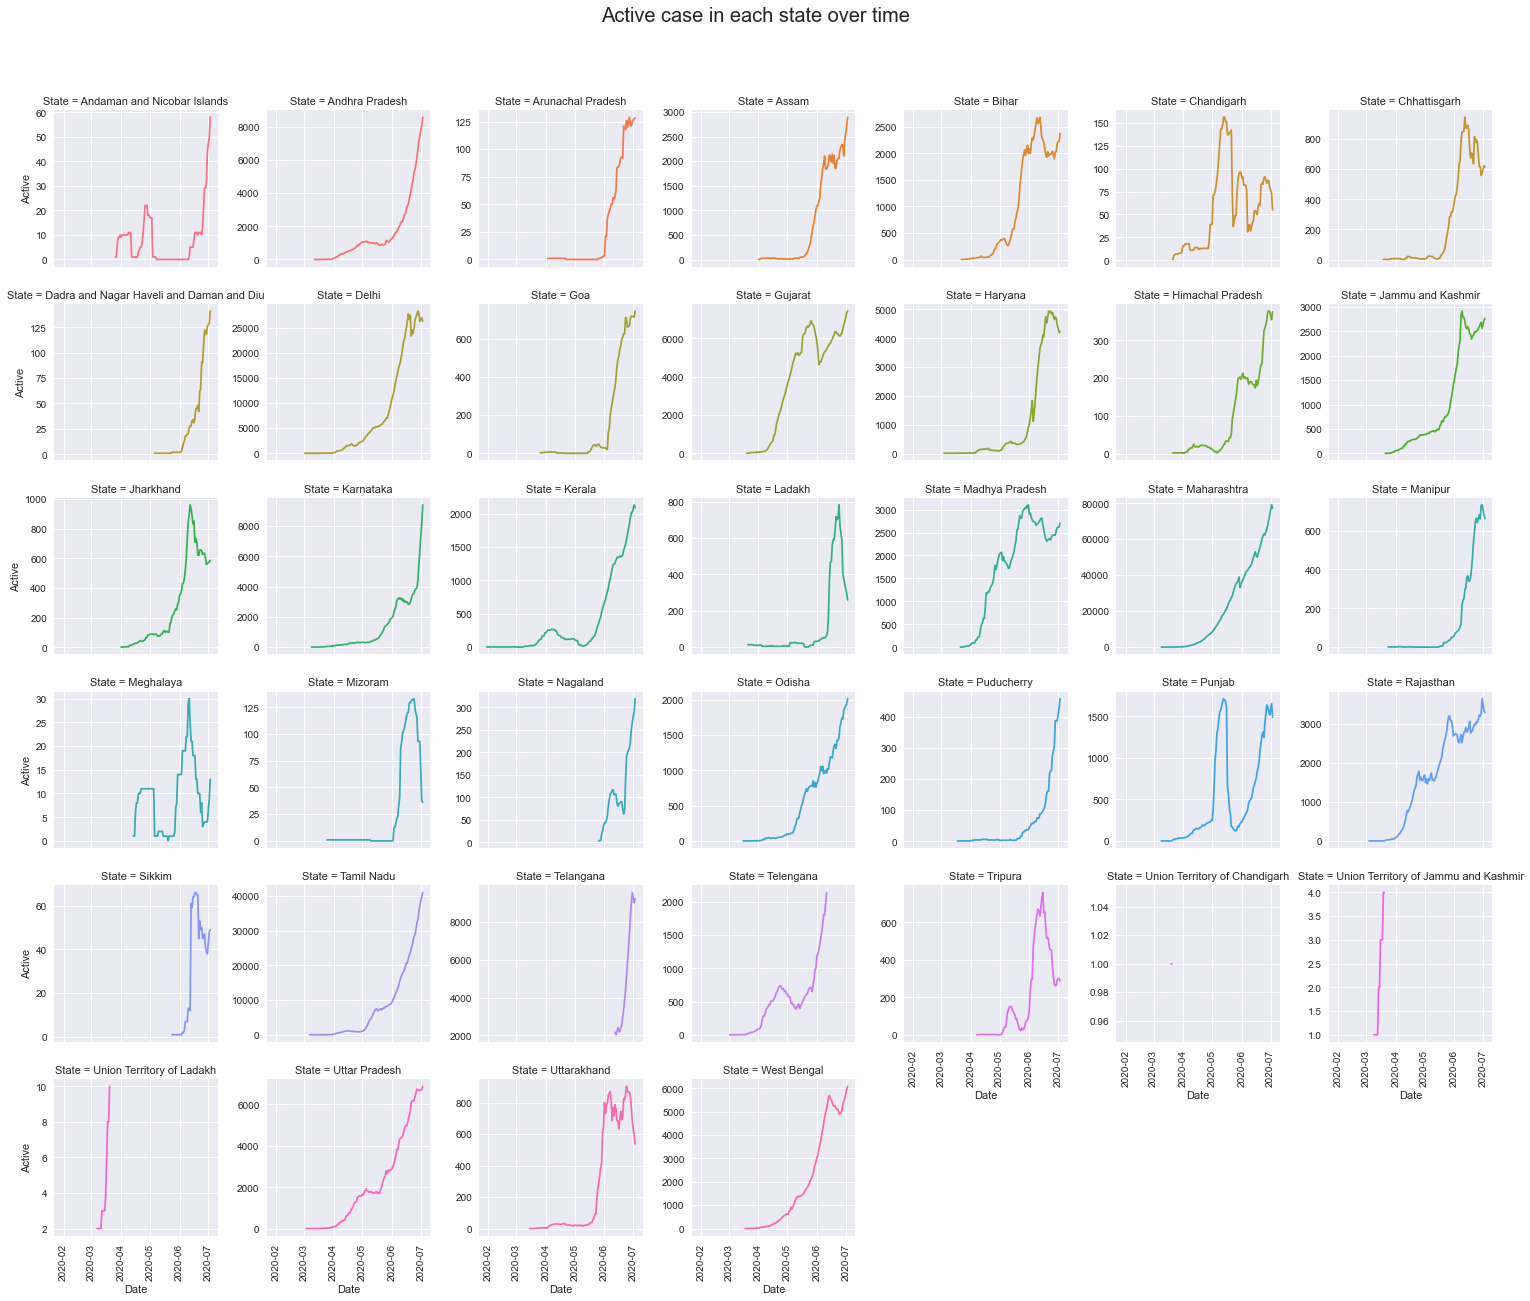

In [50]:
plt.style.use('seaborn')
g = sns.FacetGrid(df.sort_values(['State', 'Date']), 
                  col="State", hue="State", 
                  sharey=False, col_wrap=7)
g = g.map(plt.plot, "Date", "Active")
g.set_xticklabels(rotation=90)
g.fig.subplots_adjust(top=.9)
g.fig.suptitle('Active case in each state over time', 
               fontsize=20)
plt.show()